In [20]:
import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
from pybt.tools.plotters import *
from madxtools.plot_tool import *
import requests

import air_scattering_functions
import importlib
importlib.reload(air_scattering_functions)
from air_scattering_functions import *

In [21]:
T = 23.08 # GeV kinetic energy
# T = 4.54 # GeV kinetic energy ion equivalent of 750 MeV/u
E0 = 0.938 # GeV/c^2 proton rest mass
E = T + E0 # total energy
gamma = E / E0 # gamma
beta = np.sqrt(1-gamma**(-2))
p = E*beta # GeV/c beam momentum

print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p,3)} GeV/c")

gamma = 25.606
beta = 0.999
p = 24.0 GeV/c


Air region 1: 0.50 [m]
Air region 2: 4.07 [m]
Air region 3: 0.33 [m]
Air region 4: 0.10 [m]
Air region 5: 0.08 [m]
Air region 6: 0.36 [m]
Air region 7: 16.27 [m]
Air region 8: 9.48 [m]


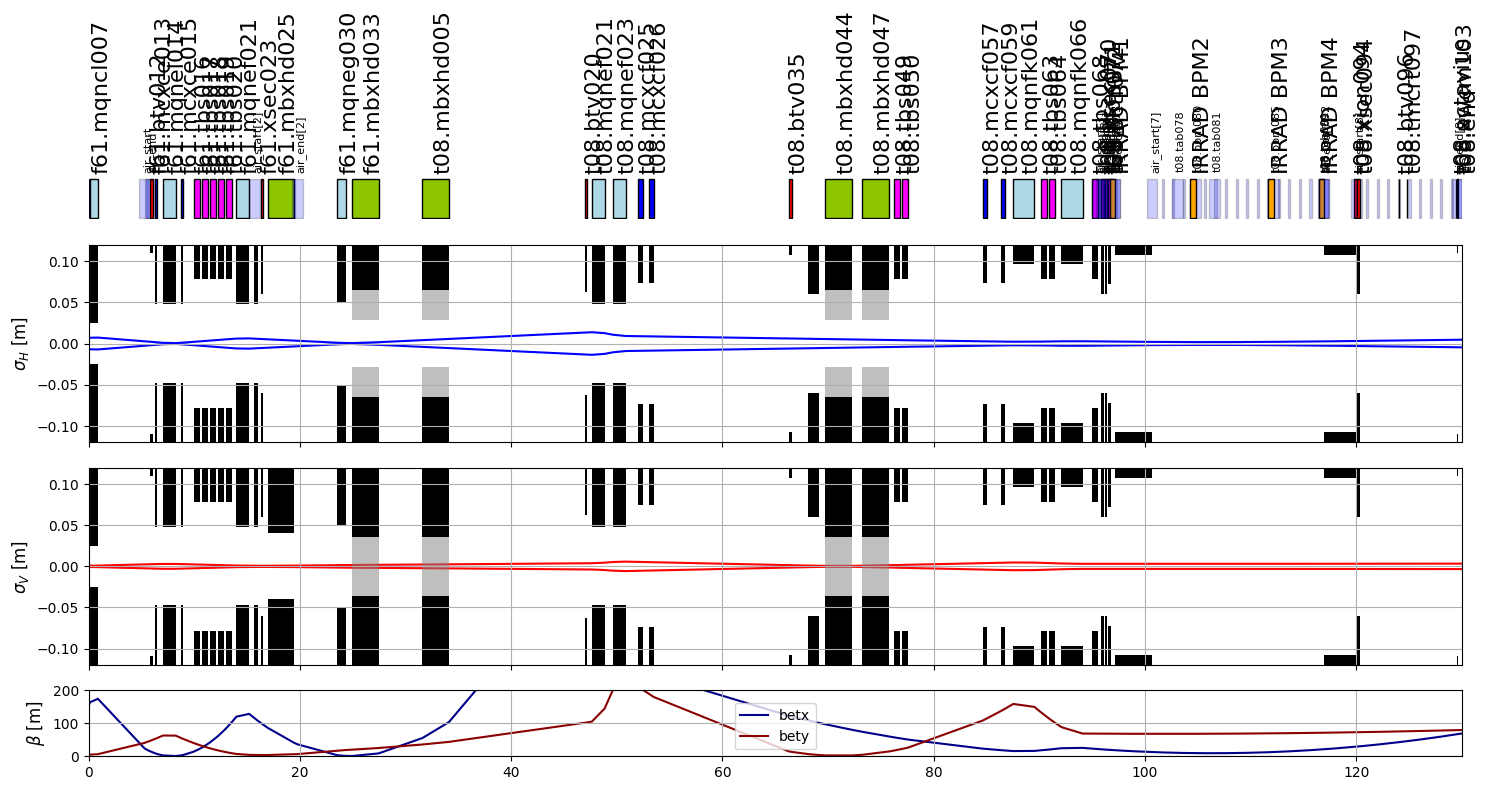

In [22]:
# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)


# # Computed quad strength with values from 2021-11-12
# madx.input("kQFN1 = "+str(0.44499)+";")
# madx.input("kQDN2 = "+str(-0.18843)+";")
# madx.input("kQFN3 = "+str(0.2028)+";")
# madx.input("kQDN4 = "+str(-0.09104)+";")
# madx.input("kQFN5 = "+str(0.19382944200388946)+";")
# madx.input("kQDN6 = "+str(-0.21251805146629948)+";")
# madx.input("kQDN7 = "+str(-0.06362635467007315)+";")
# madx.input("kQFN8 = "+str(0.06014664703049756)+";")

# Measured quad strength with values from 2023-04-20
madx.input("kQFN1 = "+str(0.49352204482265166)+";")
madx.input("kQDN2 = "+str(-0.18795693049819873)+";")
madx.input("kQFN3 = "+str(0.21499690464529042)+";")
madx.input("kQDN4 = "+str(-0.07866952254162991)+";")
madx.input("kQFN5 = "+str(0.18731139522152132)+";")
madx.input("kQDN6 = "+str(-0.1916986282879833)+";")
madx.input("kQDN7 = "+str(-0.07324191786981092)+";")
madx.input("kQFN8 = "+str(0.06283856517058146)+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)
print(f"Air region 1: {(p2-p1):.2f} [m]")

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)
print(f"Air region 2: {(p2-p1):.2f} [m]")

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)
print(f"Air region 3: {(p2-p1):.2f} [m]")

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)
print(f"Air region 4: {(p2-p1):.2f} [m]")

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)
print(f"Air region 5: {(p2-p1):.2f} [m]")

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)
print(f"Air region 6: {(p2-p1):.2f} [m]")

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)
print(f"Air region 7: {(pos_t08_bpm092-(pos_t08_vac_chamber75 + len_t08_vac_chamber75)):.2f} [m]")

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)
print(f"Air region 8: {(pos_t08_mwpc-(pos_t08_xion094 + len_t08_xion094)):.2f} [m]")


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])



In [23]:
madx.sequence['f61t8_op'].elements

[f61t8_op$start, f61.start, q74, f61.mqncl007, air_start, inner_marker0_1, air_end, f61.btv012, f61.mcxce013, f61.mqnel014, f61.mcxce015, f61.tbs016, f61.tbs017, f61.tbs018, f61.tbs019, f61.tbs020, f61.mqnef021, air_start[2], f61.bctf022, f61.bcgaa023, f61.xsec023, f61.mbxhd025, inner_marker0_2, air_end[2], f61.mqneg030, f61.mbxhd033, t08.mbxhd005, t08.btv020, t08.mqnef021, t08.mqnef023, t08.mcxcf025, t08.mcxcf026, t08.btv035, t08.xchv038, t08.mbxhd044, t08.mbxhd047, t08.tbs049, t08.tbs050, t08.mcxcf057, t08.mcxcf059, t08.mqnfk061, t08.tbs063, t08.tbs064, t08.mqnfk066, t08.tbs068, air_start[3], inner_marker0_3, air_end[3], t08.xsec070, air_start[4], inner_marker0_4, air_end[4], t08.xion071, air_start[5], inner_marker0_5, air_end[5], t08.bctf072, air_start[6], inner_marker0_6, t08.bpm073, air_end[6], t08.vaccum_chamber74, t08.vaccum_chamber75, air_start[7], inner_marker0_7, inner_marker1_7, t08.tab078, inner_marker2_7, inner_marker3_7, t08.bpm080, inner_marker4_7, t08.tab081, inner_mark

In [24]:
with open('tempfile', 'r') as f:
	lines = f.readlines()
	for ele in lines:
		print('{}'.format(ele))



  ++++++++++++++++++++++++++++++++++++++++++++

  +     MAD-X 5.09.00  (64 bit, Darwin)      +

  + Support: mad@cern.ch, http://cern.ch/mad +

  + Release   date: 2023.05.05               +

  + Execution date: 2024.03.01 15:42:28      +

  ++++++++++++++++++++++++++++++++++++++++++++

++++++ info: element redefined: mbxhd

++++++ info: kqfn1 redefined

++++++ info: kqdn2 redefined

++++++ info: kqfn3 redefined

++++++ info: kqdn4 redefined

++++++ info: kqfn5 redefined

++++++ info: kqdn6 redefined

++++++ info: kqdn7 redefined

++++++ info: kqfn8 redefined

++++++ warning: implicit element re-definition ignored: air_start

++++++ warning: implicit element re-definition ignored: air_end

++++++ info: seqedit - number of elements installed:  2

++++++ info: seqedit - number of elements moved:      0

++++++ info: seqedit - number of elements removed:    0

++++++ info: seqedit - number of elements replaced:   0

++++++ info: seqedit - number of elements installed:  1

++++++ info: s

In [25]:
# Debugging
air_start_elements = [name for name in twiss.name if "air_start" in name]
print(f"There are {len(air_start_elements)} air regions in the sequence: {air_start_elements}")

air_start_numbers = [int(name.split(':')[1]) for name in air_start_elements]
print(f"The air regions are numbered: {air_start_numbers}")

inner_elements = [name for name in twiss.name if "inner" in name]
print(f"There are {len(inner_elements)} inner regions in the sequence: {inner_elements}")

# Iterating over all air regions
for air_region_number in air_start_numbers:
    print(f"Entering air region {air_region_number}")

    inner_marker_list = [name for name in inner_elements if name.endswith(f"{air_region_number}:1")]
    for i in inner_marker_list:
        print(i)
    print("")

There are 8 air regions in the sequence: ['air_start:1', 'air_start:2', 'air_start:3', 'air_start:4', 'air_start:5', 'air_start:6', 'air_start:7', 'air_start:8']
The air regions are numbered: [1, 2, 3, 4, 5, 6, 7, 8]
There are 31 inner regions in the sequence: ['inner_marker0_1:1', 'inner_marker0_2:1', 'inner_marker0_3:1', 'inner_marker0_4:1', 'inner_marker0_5:1', 'inner_marker0_6:1', 'inner_marker0_7:1', 'inner_marker1_7:1', 'inner_marker2_7:1', 'inner_marker3_7:1', 'inner_marker4_7:1', 'inner_marker5_7:1', 'inner_marker6_7:1', 'inner_marker7_7:1', 'inner_marker8_7:1', 'inner_marker9_7:1', 'inner_marker10_7:1', 'inner_marker11_7:1', 'inner_marker12_7:1', 'inner_marker13_7:1', 'inner_marker14_7:1', 'inner_marker15_7:1', 'inner_marker0_8:1', 'inner_marker1_8:1', 'inner_marker2_8:1', 'inner_marker3_8:1', 'inner_marker4_8:1', 'inner_marker5_8:1', 'inner_marker6_8:1', 'inner_marker7_8:1', 'inner_marker8_8:1']
Entering air region 1
inner_marker0_1:1

Entering air region 2
inner_marker0_2:1


In [26]:
# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p, twiss, ex_initial, ey_initial)

/Users/eliottjohnson/git_repos/air_scattering_module/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])


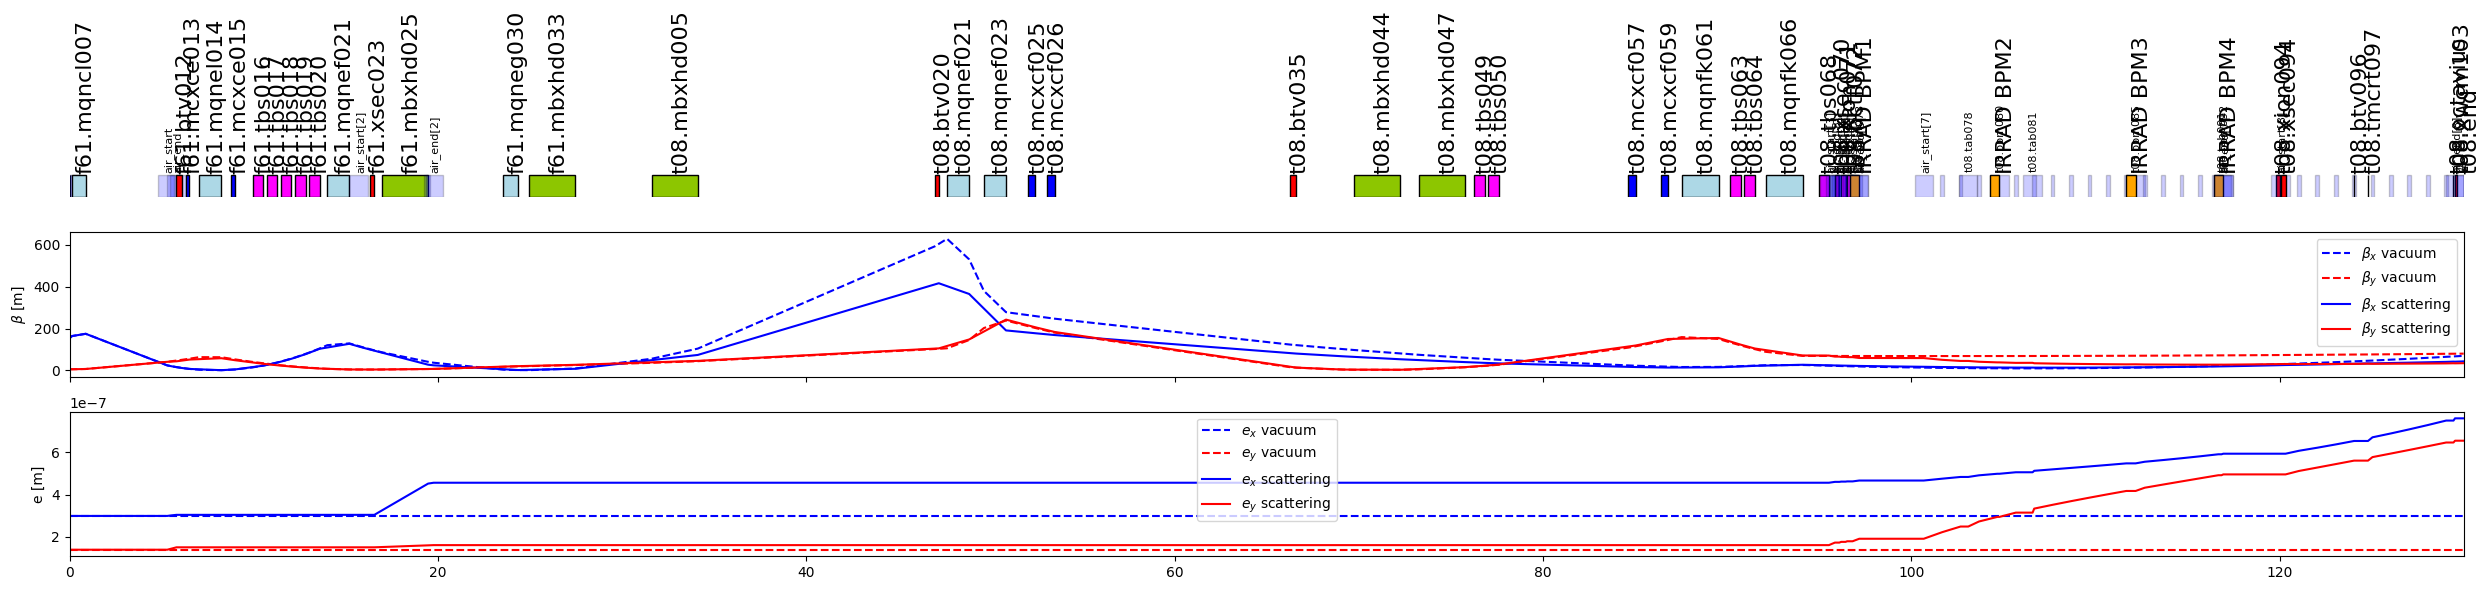

In [27]:
fig, ax = plt.subplots(3,1, figsize=(25, 6), sharex=True, height_ratios=[1, 4, 4, ], tight_layout=True)

# Make the border of ax[0] invisible
for side in ['bottom', 'right', 'top', 'left']:
    ax[0].spines[side].set_visible(False)
draw_synoptic(ax[0], twiss)
ax[1].plot(twiss.s, twiss.betx, ls="--", c="b", label=r'$\beta_{x}$ vacuum')
ax[1].plot(twiss.s, twiss.bety, ls="--", c="r", label=r'$\beta_{y}$ vacuum')
ax[1].plot(twiss_scattered.s, twiss_scattered.betx, c="b", label=r'$\beta_{x}$ scattering')
ax[1].plot(twiss_scattered.s, twiss_scattered.bety, c="r", label=r'$\beta_{y}$ scattering')
ax[1].set_ylabel(r'$\beta$ [m]')
ax[1].legend()

ax[2].plot(twiss.s, twiss.ex, ls="--", c="b",  label='$e_{x}$ vacuum')
ax[2].plot(twiss.s, twiss.ey, ls="--", c="r",  label='$e_{y}$ vacuum')
ax[2].plot(twiss_scattered.s, twiss_scattered.ex, c="b",  label='$e_{x}$ scattering')
ax[2].plot(twiss_scattered.s, twiss_scattered.ey, c="r",  label='$e_{y}$ scattering')
ax[2].set_ylabel('e [m]')
ax[2].legend()

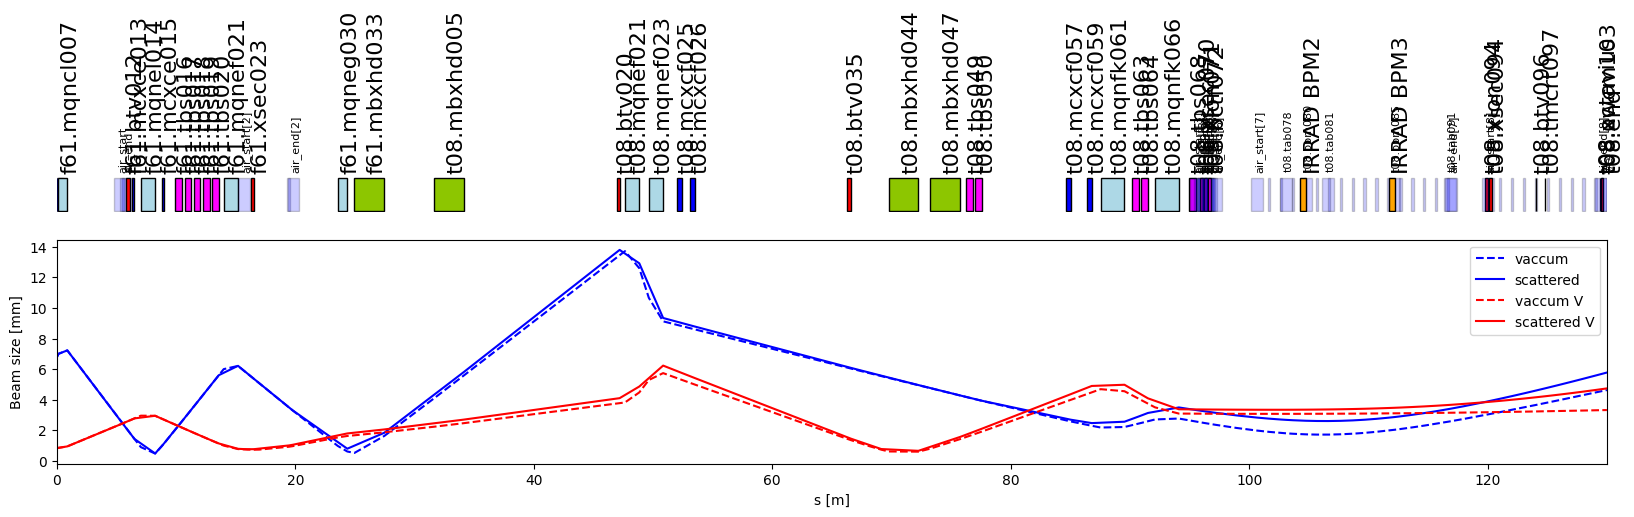

In [28]:
fig, ax = plt.subplots(2,1 ,figsize=(20, 4), sharex=True, height_ratios=[1, 4])

# Make the border of ax[0] invisible
for side in ['bottom', 'right', 'top', 'left']:
    ax[0].spines[side].set_visible(False)
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 1), ls="--", c="b", label='vaccum')
ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.betx, twiss_scattered.dx, twiss_scattered.ex, sige, 1), c="b", label='scattered')

ax[1].plot(twiss.s, 1000*beam_size(twiss.bety, twiss.dy, twiss.ey, sige, 1), ls="--", c="r", label='vaccum V')
ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.bety, twiss_scattered.dy, twiss_scattered.ey, sige, 1), c="r", label='scattered V')

ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam size [mm]')
ax[1].legend()

In [47]:
twiss_scattered.name.head(25)

f61.start                f61.start:1
#s                  f61t8_op$start:1
drift_0[0]                 drift_0:0
q74                            q74:1
f61.mqncl007          f61.mqncl007:1
air_start                air_start:1
inner_marker0_1    inner_marker0_1:1
air_end                    air_end:1
f61.btv012              f61.btv012:1
f61.mcxce013          f61.mcxce013:1
f61.mqnel014          f61.mqnel014:1
f61.mcxce015          f61.mcxce015:1
f61.tbs016              f61.tbs016:1
f61.tbs017              f61.tbs017:1
f61.tbs018              f61.tbs018:1
f61.tbs019              f61.tbs019:1
f61.tbs020              f61.tbs020:1
f61.mqnef021          f61.mqnef021:1
air_start[2]             air_start:2
f61.bctf022            f61.bctf022:1
f61.bcgaa023          f61.bcgaa023:1
f61.xsec023            f61.xsec023:1
inner_marker0_2    inner_marker0_2:1
air_end[2]                 air_end:2
f61.mqneg030          f61.mqneg030:1
Name: name, dtype: object

/Users/eliottjohnson/git_repos/air_scattering_module/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])


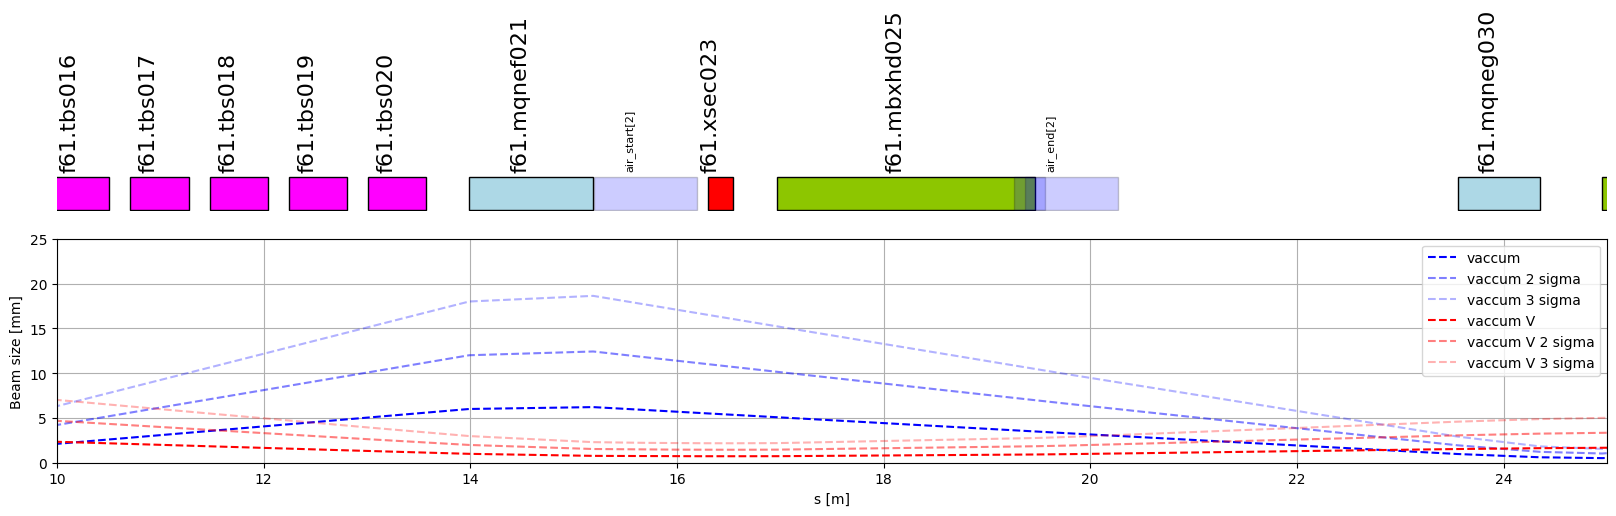

In [59]:
fig, ax = plt.subplots(2,1 ,figsize=(20, 4), sharex=True, height_ratios=[1, 4])

# Make the border of ax[0] invisible
for side in ['bottom', 'right', 'top', 'left']:
    ax[0].spines[side].set_visible(False)
draw_synoptic(ax[0], twiss)


ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 1), ls="--", c="b", label='vaccum')
ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 2), ls="--", c="b", label='vaccum 2 sigma', alpha=0.5)
ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 3), ls="--", c="b", label='vaccum 3 sigma', alpha=0.3)

ax[1].plot(twiss.s, 1000*beam_size(twiss.bety, twiss.dy, twiss.ey, sige, 1), ls="--", c="r", label='vaccum V')
ax[1].plot(twiss.s, 1000*beam_size(twiss.bety, twiss.dy, twiss.ey, sige, 2), ls="--", c="r", label='vaccum V 2 sigma', alpha=0.5)
ax[1].plot(twiss.s, 1000*beam_size(twiss.bety, twiss.dy, twiss.ey, sige, 3), ls="--", c="r", label='vaccum V 3 sigma', alpha=0.3)


ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam size [mm]')
ax[1].legend()

ax[1].set_xlim(10, 25)
ax[1].set_ylim(0,25)

ax[1].grid()

In [ ]:
twiss_scattered

In [29]:
def draw_synopticV(ax, twiss):
    fontsize = 10
    offset_s = 0.2
    for _, row in twiss.iterrows():
        label = _
        if (row['keyword'] == 'monitor' and _ != "f61.bctf022" and _ != "f61.bcgaa023"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='r', edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75, row.s-row.l/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'marker'):
            if 'inner' in label:
                _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.1), 0.3, row['l']+0.2, facecolor='b', alpha=0.2, edgecolor='k'))
            elif 'hidden' in label:
                _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.1, row['l'], facecolor='k', alpha=0.5, edgecolor='k'))
            else:
                _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.1), 0.4, row['l']+0.2, facecolor='k', alpha=0.2, edgecolor='k'))
            # If label does not contain INNER and HIDDEN in the string then add the label
            if (('inner' not in label) and ('hidden' not in label)):
                ax.annotate(label,
                            xy=(0.75*2, row.s-row.l/2-offset_s), xycoords='data',
                            xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'rbend' or row['keyword'] == 'sbend' or row['keyword'] == 'matrix'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='#8DC600', edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'instrument'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='magenta', alpha=1.0, edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'quadrupole'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='lightblue', alpha=1.0, edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'hkicker' or row['keyword'] == 'vkicker'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='blue', alpha=1.0, edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        elif (row['keyword'] == 'multipole'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='orange', alpha=1.0, edgecolor='orange'))
        if (label == "dumpwall"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']), 0.6, row['l'], facecolor='blue', alpha=1.0, edgecolor='k'))
            ax.annotate("Dump wall",
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        if (row.name == "t08.bpm073"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.5), 0.6, row['l']+0.5, facecolor='orange', alpha=1.0, edgecolor='k'))
            ax.annotate("IRRAD BPM1",
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        if (row.name == "t08.bpm080"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.5), 0.6, row['l']+0.5, facecolor='orange', alpha=1.0, edgecolor='k'))
            ax.annotate("IRRAD BPM2",
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        if (row.name == "t08.bpm085"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.5), 0.6, row['l']+0.5, facecolor='orange', alpha=1.0, edgecolor='k'))
            ax.annotate("IRRAD BPM3",
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        if (row.name == "t08.bpm092"):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.5), 0.6, row['l']+0.5, facecolor='orange', alpha=1.0, edgecolor='k'))
            ax.annotate("IRRAD BPM4",
                        xy=(0.75, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
        if (row['keyword'] == 'collimator'):
            _ = ax.add_patch(mpl.patches.Rectangle((0, row['s']-row['l']-0.5), 0.3, row['l']+0.5, facecolor='grey', alpha=1.0, edgecolor='k'))
            ax.annotate(label,
                        xy=(0.75/2, row['s']-row['l']/2-offset_s), xycoords='data',
                        xytext=(0.0, 0.0), textcoords='offset points', rotation=0, fontsize=fontsize)
    return ax


/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_76803/3820767893.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylim(0, twiss.s[-1])


(0.0, 2.0)

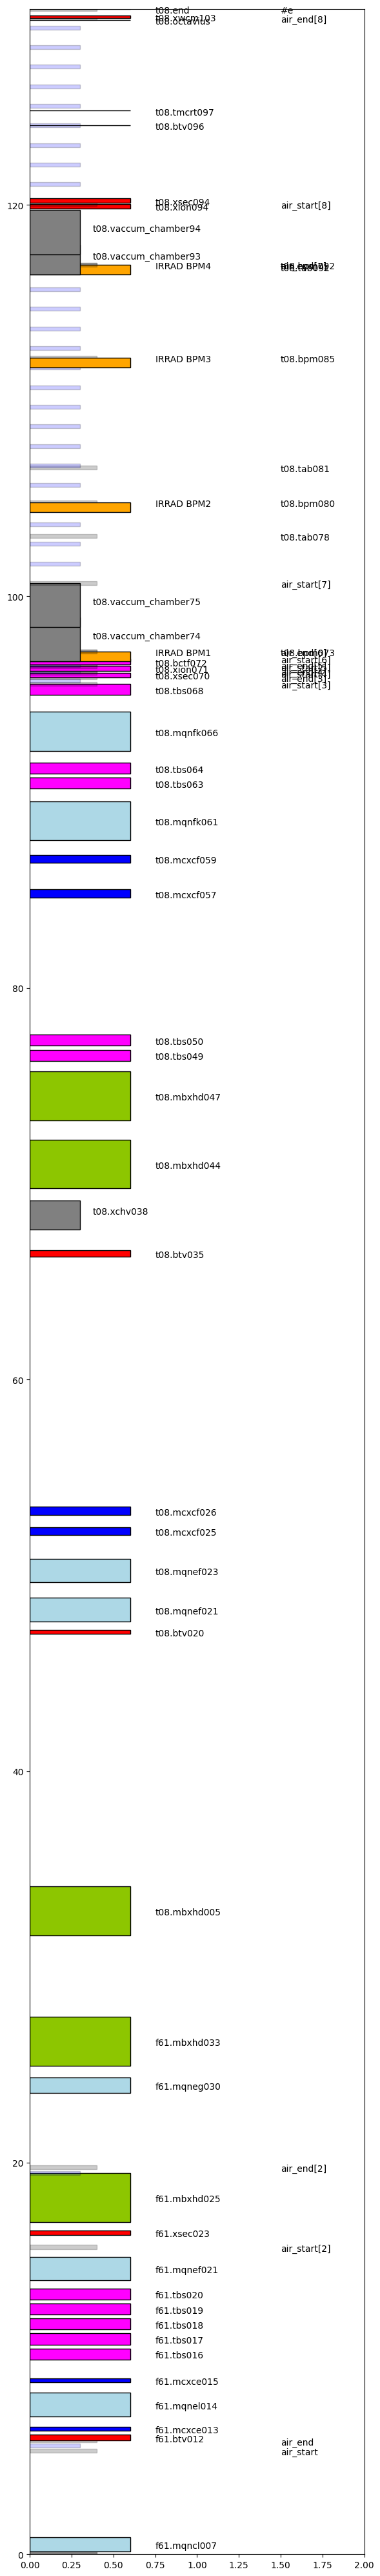

In [30]:
fig, ax = plt.subplots(figsize=(6, 40), sharex=True, tight_layout=True)
draw_synopticV(ax, twiss)
ax.set_ylim(0, twiss.s[-1])
ax.set_xlim(0, 2)

In [31]:
madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length

1.75

# Beam size at the IRRAD BPMs

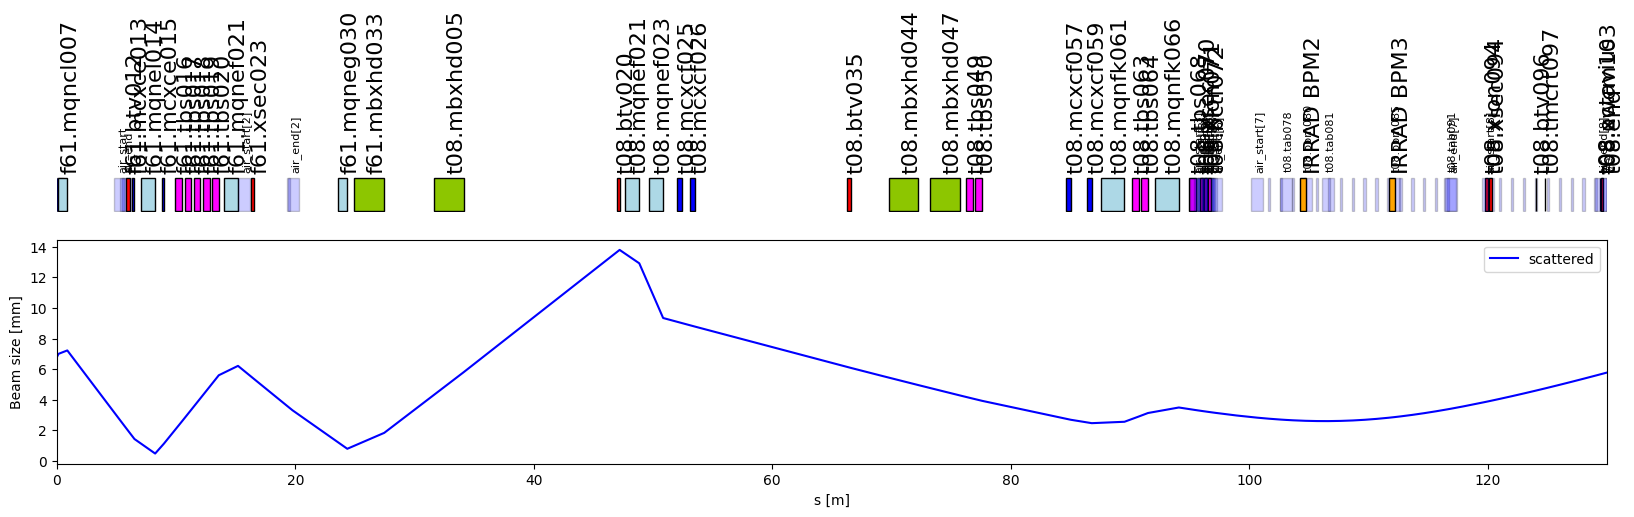

In [32]:
fig, ax = plt.subplots(2,1 ,figsize=(20, 4), sharex=True, height_ratios=[1, 4])

# Make the border of ax[0] invisible
for side in ['bottom', 'right', 'top', 'left']:
    ax[0].spines[side].set_visible(False)
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.betx, twiss_scattered.dx, twiss_scattered.ex, sige, 1), c="b", label='scattered')

ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam size [mm]')
ax[1].legend()

In [33]:
list(twiss.name)

['f61t8_op$start:1',
 'f61.start:1',
 'drift_0:0',
 'q74:1',
 'f61.mqncl007:1',
 'drift_1:0',
 'air_start:1',
 'drift_2:0',
 'inner_marker0_1:1',
 'drift_3:0',
 'air_end:1',
 'f61.btv012:1',
 'drift_4:0',
 'f61.mcxce013:1',
 'drift_5:0',
 'f61.mqnel014:1',
 'drift_6:0',
 'f61.mcxce015:1',
 'drift_7:0',
 'f61.tbs016:1',
 'drift_8:0',
 'f61.tbs017:1',
 'drift_9:0',
 'f61.tbs018:1',
 'drift_10:0',
 'f61.tbs019:1',
 'drift_11:0',
 'f61.tbs020:1',
 'drift_12:0',
 'f61.mqnef021:1',
 'drift_13:0',
 'air_start:2',
 'f61.bctf022:1',
 'drift_14:0',
 'f61.bcgaa023:1',
 'drift_15:0',
 'f61.xsec023:1',
 'drift_16:0',
 'f61.mbxhd025:1',
 'inner_marker0_2:1',
 'drift_17:0',
 'air_end:2',
 'drift_18:0',
 'f61.mqneg030:1',
 'drift_19:0',
 'f61.mbxhd033:1',
 'drift_20:0',
 't08.mbxhd005:1',
 'drift_21:0',
 't08.btv020:1',
 'drift_22:0',
 't08.mqnef021:1',
 'drift_23:0',
 't08.mqnef023:1',
 'drift_24:0',
 't08.mcxcf025:1',
 'drift_25:0',
 't08.mcxcf026:1',
 'drift_26:0',
 't08.btv035:1',
 'drift_27:0',
 

In [34]:
twiss_scattered.loc[twiss_scattered.s == twiss.loc["t08.bpm092"].s].betx

air_end[7]    19.025076
Name: betx, dtype: float64

In [35]:
s_list = []
sigma_list = []
sigma_list_vac = []
for bpm in ["t08.bpm073","t08.bpm080","t08.bpm085","t08.bpm092","t08.xwcm103"]:

    s = twiss.loc[bpm].s
    print(s)
    sigma = 1000*beam_size(twiss_scattered.loc[twiss_scattered.s == s].betx, twiss_scattered.loc[twiss_scattered.s == s].dx, twiss_scattered.loc[twiss_scattered.s == s].ex, sige, 1)
    sigma_vac = 1000*beam_size(twiss.loc[bpm].betx, twiss.loc[bpm].dx, twiss.loc[bpm].ex, sige, 1)
    print(sigma)

    s_list.append(s)
    sigma_list.append(sigma)
    sigma_list_vac.append(sigma_vac)

97.17936726075133
air_end[6]    3.138778
dtype: float64
104.79136726075133
t08.bpm080    2.618289
dtype: float64
112.18636726075133
t08.bpm085    2.861641
dtype: float64
116.94836726075133
air_end[7]    3.415185
dtype: float64
129.6593672607513
t08.xwcm103    5.7037
dtype: float64


In [36]:
sigma_list_vac

[2.353147522926952,
 1.728327393998448,
 2.0285681842046714,
 2.592731030209208,
 4.571335231774783]

(0.0, 20.0)

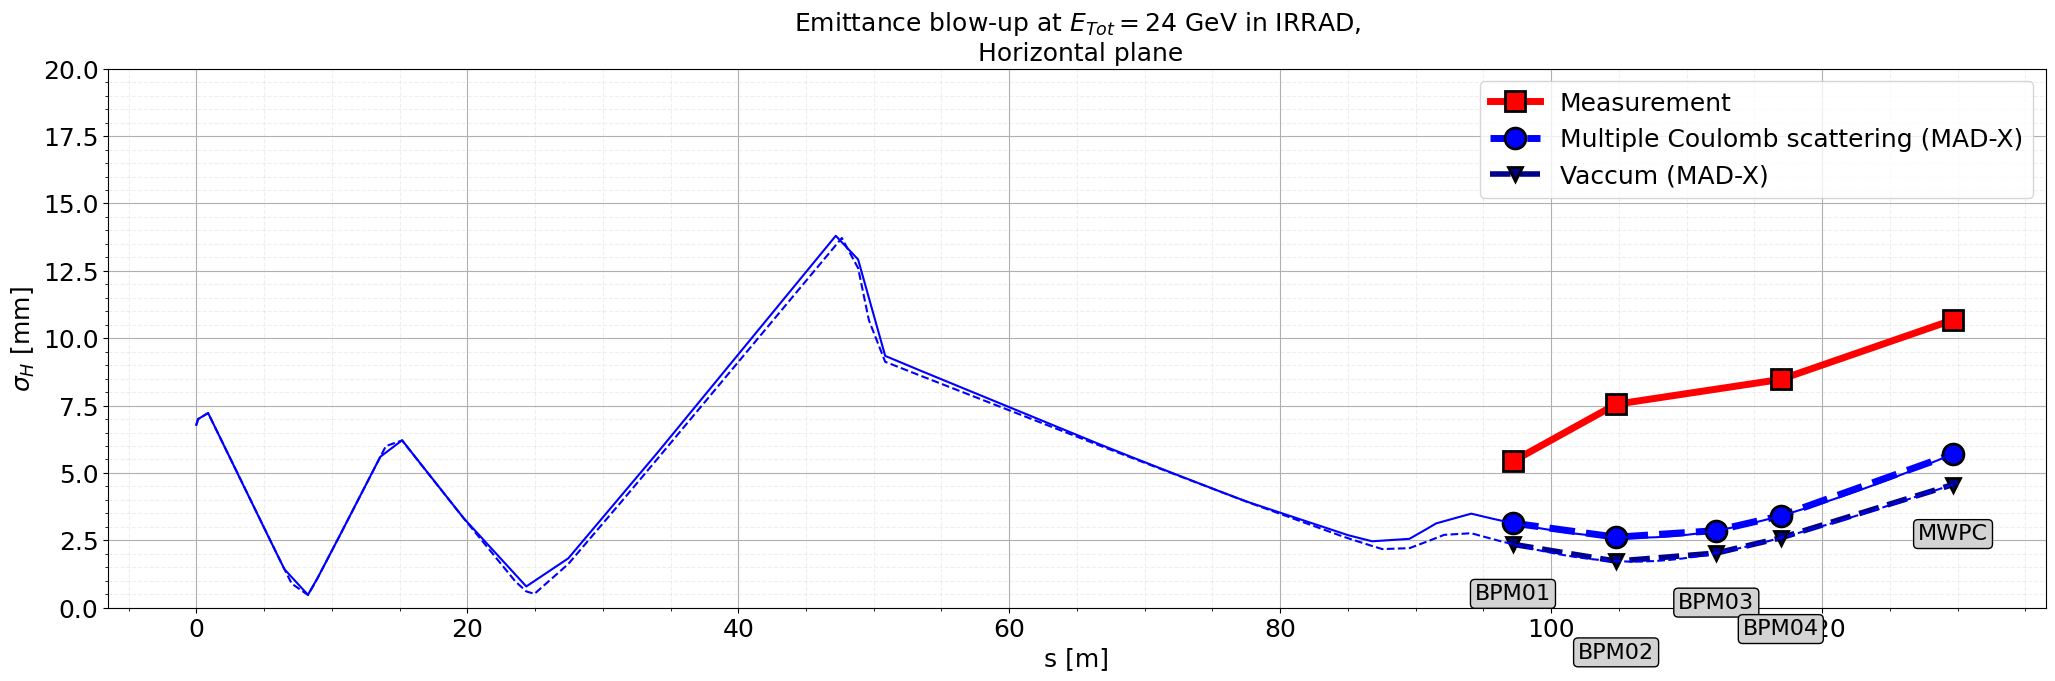

In [37]:
fig, ax = plt.subplots(figsize=(25,7))
sigma_meas = [5.436028, 7.549536, 8.472393, 10.682260]
ax.plot([97.17936726075133, 104.79136726075133, 116.94836726075133, 129.6593672607513], sigma_meas, marker="s", markersize=15, mew=2, mec ="k", lw=5, label="Measurement", color="r")
ax.plot(s_list, sigma_list, marker="o", markersize=15, mew=2, lw=5, mec="k", mfc ="blue", ls="--", alpha=1.0, label="Multiple Coulomb scattering (MAD-X)", color="b")
ax.plot(s_list, sigma_list_vac, marker="v", markersize=10, mew=2, lw=4, mec="k", mfc ="darkblue", ls="--", alpha=1.0, label="Vaccum (MAD-X)", color="darkblue")

ax.plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 1), ls="--", c="b")
ax.plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.betx, twiss_scattered.dx, twiss_scattered.ex, sige, 1), c="b")

i = 0
instrum_name = ["BPM01", "BPM02", "BPM03", "BPM04", "MWPC"]
for s in s_list:
    
    ax.annotate(instrum_name[i],
                xy=(s, sigma_list_vac[i]),        # Point to annotate
                xytext=(0,  (-70 if i %2 == 1 else -40)),              # Offset for text (centered below)
                textcoords='offset points',   # Specify the text coordinates
                ha='center',                  # Horizontal alignment
                fontsize=16,
                bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='lightgray'))  # Optional box around text
    i+=1

ax.legend(fontsize=18)
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel("s [m]", fontsize=18)
ax.set_ylabel(r"$\sigma_{H}$ [mm]", fontsize=18)
ax.set_title("Emittance blow-up at $E_{Tot}=$"+str(24)+" GeV in IRRAD,\n Horizontal plane", fontsize=18)

ax.grid(True, which="major")
ax.grid(True, which="minor", ls="--", alpha=0.2)
ax.set_ylim(0,20)
# plt.savefig("fig/emittance_blow_up.png", dpi=300, format=None, metadata=None,
#         bbox_inches="tight", transparent = False)